# Can we determine malaria infection from images of blood cells?

Images source: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

(via https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria)

In [47]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# set up image generator flowing from the directory of images (too many to load into memory at once)
# also specify size to rescale images to
target_size = (150, 150)
batch_size = 50

image_gen = ImageDataGenerator(validation_split = 0.2)

train_image_gen_flow = image_gen.flow_from_directory(r'D:\Stuff\Machine Learning\images\train\\', 
                                                            batch_size = batch_size, 
                                                            target_size = target_size,
                                                            subset = 'training',
                                                            classes = ['Uninfected', 'Parasitized'], 
                                                            class_mode = 'binary', seed = 0)

val_image_gen_flow = image_gen.flow_from_directory(r'D:\Stuff\Machine Learning\images\train\\', 
                                                            batch_size = batch_size, 
                                                            target_size = target_size,
                                                            subset = 'validation',
                                                            classes = ['Uninfected', 'Parasitized'], 
                                                            class_mode = 'binary', seed = 0)

Found 18738 images belonging to 2 classes.
Found 4684 images belonging to 2 classes.


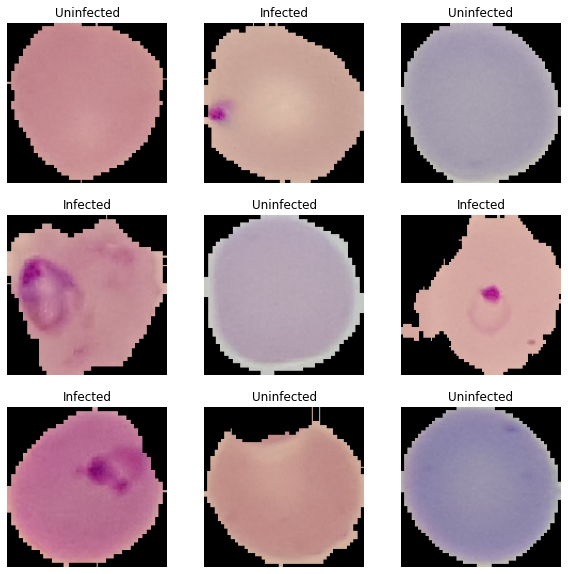

In [25]:
# plot some example blood cells
batch_data, batch_labels = next(train_image_gen_flow)

plt.figure(figsize = (10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(batch_data[i].astype('uint8'))
    plt.axis('off')
    plt.title('Uninfected' if batch_labels[i] == 0.0 else 'Infected')
plt.show()

In [3]:
# create neural network architecture, and assign loss function/optimizer
# also rescale RGB values to 0-1 from 0-255
model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(150, 150, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['BinaryAccuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [5]:
# train model
history = model.fit(train_image_gen_flow, validation_data = val_image_gen_flow, epochs = 10)

Epoch 1/10
375/375 [==============================] - 582s 2s/step - loss: 0.4786 - binary_accuracy: 0.7251 - val_loss: 0.2028 - val_binary_accuracy: 0.9229
Epoch 2/10
375/375 [==============================] - 140s 374ms/step - loss: 0.1918 - binary_accuracy: 0.9352 - val_loss: 0.2015 - val_binary_accuracy: 0.9330
Epoch 3/10
375/375 [==============================] - 150s 401ms/step - loss: 0.1636 - binary_accuracy: 0.9489 - val_loss: 0.1699 - val_binary_accuracy: 0.9285
Epoch 4/10
375/375 [==============================] - 150s 400ms/step - loss: 0.1377 - binary_accuracy: 0.9559 - val_loss: 0.1749 - val_binary_accuracy: 0.9396
Epoch 5/10
375/375 [==============================] - 156s 417ms/step - loss: 0.1194 - binary_accuracy: 0.9606 - val_loss: 0.1727 - val_binary_accuracy: 0.9357
Epoch 6/10
375/375 [==============================] - 159s 424ms/step - loss: 0.0972 - binary_accuracy: 0.9680 - val_loss: 0.1715 - val_binary_accuracy: 0.9355
Epoch 7/10
375/375 [=======================

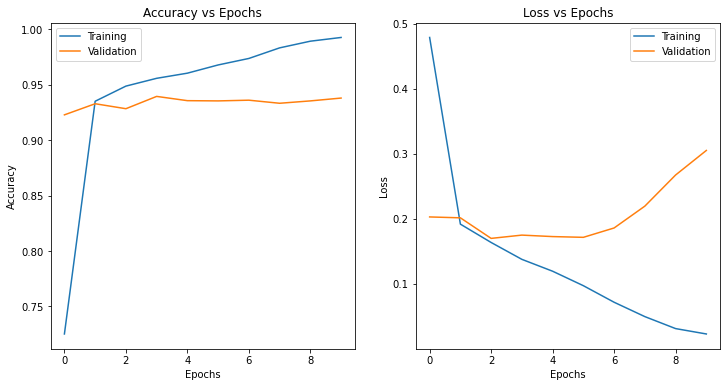

In [130]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

In [7]:
# save model
model.save(r'D:\Stuff\Machine Learning\images\model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: D:\Stuff\Machine Learning\images\model\assets


In [2]:
# load model
model = tf.keras.models.load_model(r'D:\Stuff\Machine Learning\images\model')

---

# Test on unseen images:

In [45]:
test_image_gen_flow = ImageDataGenerator().flow_from_directory(r'D:\Stuff\Machine Learning\images\test\\', 
                                                            batch_size = batch_size, 
                                                            target_size = target_size,
                                                            classes = ['Uninfected', 'Parasitized'], 
                                                            class_mode = 'binary', seed = 0)

Found 4136 images belonging to 2 classes.


In [46]:
# predict infection class for each batch from generator, storing actual class as well
pred_and_actual = []

for test_images, test_labels in test_image_gen_flow:
    predictions = model.predict(test_images)
    class_predictions = (predictions > 0.5).astype('int32').reshape(len(test_images),)
    pred_and_actual += [(class_predictions, test_labels)]
    
    if len(pred_and_actual) >= np.ceil(4136 / batch_size):
        break
    
pred_and_actual

[(array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
         1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
         1, 0, 1, 1, 0, 1]),
  array([0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
         1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
         0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.],
        dtype=float32)),
 (array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
         0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
         1, 1, 0, 1, 1, 1]),
  array([1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
         0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
         0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.],
        dtype=float32)),
 (array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0

In [100]:
# reshape output to 1D lists in order for easy performance measuring using sklearn
y_pred = []
y_actual = []

for y_p, y_a in pred_and_actual:
    y_pred += list(y_p)
    y_actual += list(y_a)
    
len(y_pred), len(y_actual)

(4136, 4136)

In [103]:
print(classification_report(y_pred, y_actual))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2160
           1       0.92      0.97      0.95      1976

    accuracy                           0.95      4136
   macro avg       0.95      0.95      0.95      4136
weighted avg       0.95      0.95      0.95      4136



In [111]:
print(['# True Positives', '# False Negatives'])
print(['# False Positives', '# True Negatives'])
print()
print(confusion_matrix(y_pred, y_actual))

['# True Positives', '# False Negatives']
['# False Positives', '# True Negatives']

[[2003  157]
 [  65 1911]]


Model is very accurate! 

---

# Simpler model test WIP (quicker, but nowhere near as accurate)

In [131]:
test_simple_model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(150, 150, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'), 
    tf.keras.layers.Dense(200, activation='relu'), 
    tf.keras.layers.Dense(1)
])

test_simple_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['BinaryAccuracy'])

In [132]:
test_simple_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 200)               13500200  
_________________________________________________________________
dense_15 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 201       
Total params: 13,540,601
Trainable params: 13,540,601
Non-trainable params: 0
_________________________________________________________________


In [133]:
test_history = test_simple_model.fit(train_image_gen_flow, validation_data = val_image_gen_flow, epochs = 10)

Epoch 1/10
375/375 [==============================] - 40s 107ms/step - loss: 1.0006 - binary_accuracy: 0.5755 - val_loss: 0.6317 - val_binary_accuracy: 0.5965
Epoch 2/10
375/375 [==============================] - 38s 102ms/step - loss: 0.6451 - binary_accuracy: 0.6000 - val_loss: 0.6693 - val_binary_accuracy: 0.6652
Epoch 3/10
375/375 [==============================] - 38s 102ms/step - loss: 0.6342 - binary_accuracy: 0.6012 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 4/10
375/375 [==============================] - 38s 102ms/step - loss: 0.6739 - binary_accuracy: 0.5579 - val_loss: 0.6548 - val_binary_accuracy: 0.5653
Epoch 5/10
375/375 [==============================] - 39s 105ms/step - loss: 0.6479 - binary_accuracy: 0.5995 - val_loss: 0.7102 - val_binary_accuracy: 0.6390
Epoch 6/10
375/375 [==============================] - 39s 105ms/step - loss: 0.6298 - binary_accuracy: 0.6219 - val_loss: 0.6521 - val_binary_accuracy: 0.6648
Epoch 7/10
375/375 [==========================

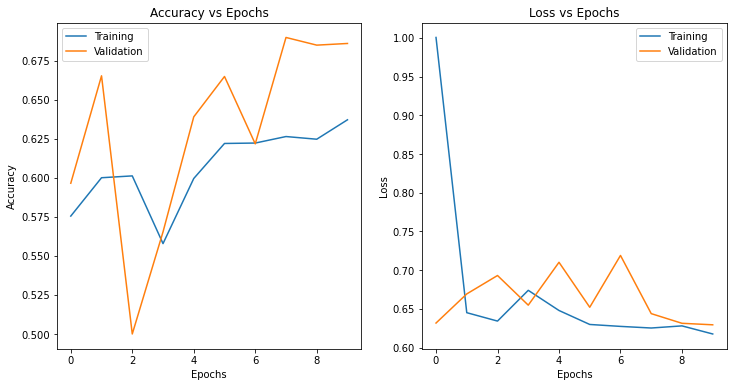

In [134]:
acc = test_history.history['binary_accuracy']
val_acc = test_history.history['val_binary_accuracy']

loss = test_history.history['loss']
val_loss = test_history.history['val_loss']
epochs = range(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training')
plt.plot(epochs, val_acc, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training')
plt.plot(epochs, val_loss, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()